In [154]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [155]:
DF = pd.read_csv('C:/Users/giulia macis/Desktop/UBISOFT/badvideogames/youtube_comments_eVNQ-T6blIA.csv')
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=eVNQ-T6blIA,Call of Duty: Modern Warfare 3 Single-Player C...,2023-11-04T16:49:52Z,@mikemoussa4013,"I liked this campaign, the strategy use of the...",2024-11-08T12:48:45Z,0,0
1,https://www.youtube.com/watch?v=eVNQ-T6blIA,Call of Duty: Modern Warfare 3 Single-Player C...,2023-11-04T16:49:52Z,@darren767,"Ive been disappointed by games before, but thi...",2024-11-04T18:38:51Z,0,0
2,https://www.youtube.com/watch?v=eVNQ-T6blIA,Call of Duty: Modern Warfare 3 Single-Player C...,2023-11-04T16:49:52Z,@Robwappieoverijsel,i wait for this one for black friday,2024-11-01T22:01:10Z,0,0
3,https://www.youtube.com/watch?v=eVNQ-T6blIA,Call of Duty: Modern Warfare 3 Single-Player C...,2023-11-04T16:49:52Z,@ih8suvz,Only 14 missions? I'm glad I didn't pay money ...,2024-10-26T03:10:05Z,0,0
4,https://www.youtube.com/watch?v=eVNQ-T6blIA,Call of Duty: Modern Warfare 3 Single-Player C...,2023-11-04T16:49:52Z,@NikFromEarth,Is it worth playing for free?,2024-10-25T20:18:34Z,0,0
...,...,...,...,...,...,...,...,...
1213,https://www.youtube.com/watch?v=eVNQ-T6blIA,Call of Duty: Modern Warfare 3 Single-Player C...,2023-11-04T16:49:52Z,@austinjones7104,Rare W from ign 😎,2023-11-04T16:50:38Z,0,27
1214,https://www.youtube.com/watch?v=eVNQ-T6blIA,Call of Duty: Modern Warfare 3 Single-Player C...,2023-11-04T16:49:52Z,@datgeekyguy2925,First!,2023-11-04T16:50:29Z,0,1
1215,https://www.youtube.com/watch?v=eVNQ-T6blIA,Call of Duty: Modern Warfare 3 Single-Player C...,2023-11-04T16:49:52Z,@olliepopAMV,It’s mid,2023-11-04T16:50:27Z,0,1
1216,https://www.youtube.com/watch?v=eVNQ-T6blIA,Call of Duty: Modern Warfare 3 Single-Player C...,2023-11-04T16:49:52Z,@Spiralr,It’s a 4,2023-11-04T16:50:27Z,0,1


In [156]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video',
    'review','call','duty','ever','clean','house',"game", "campaign", "cod", "year", 
    "buy", "better", "worst", "best", "finally", "honest","dlc", "gave", "great", "new", 
    "still", "bad", "wow", "lol", "open", "guy","give", "must", "seems", "see", "going", 
    "nothing", "one", "look", "thank","soap", "mean", "want", "getting", "first", "thanks", 
    "hour", "say", "instead","warfare","played","saying"
])
lmtzr = WordNetLemmatizer()

In [157]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts


def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams

In [158]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
177,2023-11-11,IGN is working on its integrity is a great sight.,working integrity great sight
178,2023-11-11,Great review. Terrible campaign. Genuinely dev...,great terrible campaign genuinely devastated c...
179,2023-11-11,Give this man a raise.,give man raise
180,2023-11-11,Damm only 4 hours story that's bad...it's like...,damm hour story thats badits multiplayer matter
181,2023-11-11,Yea ima wait till Black Friday to get it,yea ima wait till black friday
...,...,...,...
1213,2023-11-04,Rare W from ign 😎,rare
1214,2023-11-04,First!,first
1215,2023-11-04,It’s mid,mid
1216,2023-11-04,It’s a 4,


In [159]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=10).reset_index(drop=True)  # Use any integer as the random_state

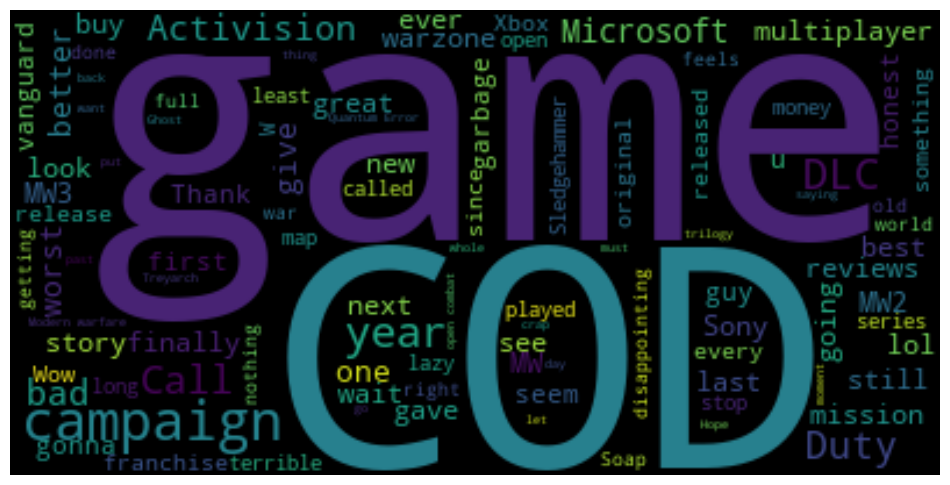

In [160]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [161]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly negative comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2023-11-06,All they needed to do... So simple.... So easy...,needed simple easy remaster original one,positive
1,2023-11-04,Shitty campaign and they killed Soap. Again!!!,shitty campaign killed soap,negative
2,2023-11-07,summary : lazy dev,summary lazy,negative
3,2023-11-04,Garbage,garbage,neutral
4,2023-11-04,Basically the rumored the DLC,rumored dlc,neutral
...,...,...,...,...
495,2023-11-07,This seems like a podcast campaign,seems podcast campaign,neutral
496,2023-11-11,How dare! Phill won`t like this,dare phill,neutral
497,2023-11-04,So it wasn’t a meme when people said it was a ...,meme said dlc,neutral
498,2023-11-04,A moment of silence for all the clowns who pre...,moment silence clown preordered dlc,neutral


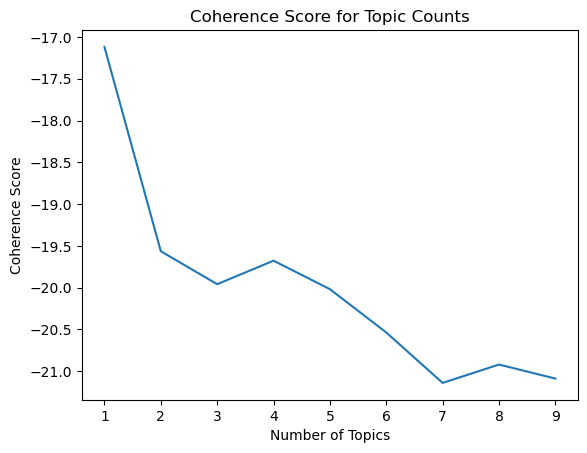

In [162]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [163]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 1
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.003*"activision" + 0.003*"microsoft" + 0.003*"vanguard" + 0.003*"mission" + 0.003*"warzone" + 0.002*"multiplayer" + 0.002*"terrible" + 0.002*"original" + 0.002*"story" + 0.002*"xbox"')]


The line drops when adding more than 1 topic, so taking more topics would lower the coherence score too much 

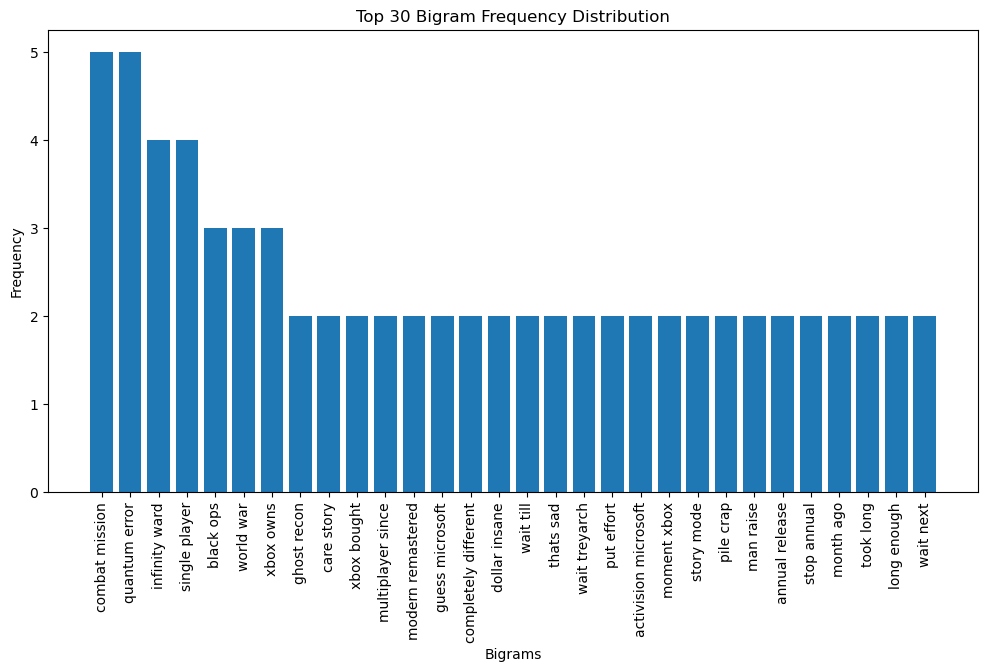

In [165]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [166]:
#Load the existing df_topics CSV file
#title=DF['title'].unique()
#file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_bad_topics.csv'
#df_bad_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
#new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
#df_bad_topics = pd.concat([df_bad_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
#df_bad_topics.to_csv(file_path, index=False)
#df_bad_topics

,title,num_topics
0,The Last of Us Part II - Angry Review,1
1,Fallout 76 Angry Review,1
2,Is Kingdom Come Deliverance Racist?,1
3,"So far, I do not recommend: Battlefield 2042 (...",4
4,Call of Duty: Modern Warfare 3 Single-Player C...,1
